# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
## Keras Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
## Accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

## 1) Load Data

In [2]:
df = pd.read_csv('/content/ionosphere_data.csv')

# Display Data

In [11]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


## Check Null Values

In [4]:
df.isnull().sum()  

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

## 3) Split Dataset

In [5]:
X=df.drop(['label'],axis=1)
y=df['label']

## Normalization

In [6]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

## Encode Label

In [14]:
y =y.astype('category').cat.codes  

## SPlit dataset

In [16]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

# Model

In [53]:
lono = Sequential()
lono.add(Dense(16, input_shape=(34,), activation='relu')),
lono.add(Dense(1, activation='sigmoid'))

## Binary So Using Binary Crossentropy Loss and Optimzer = Adam

In [54]:
lono.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

## Train

## Need 1000 epochs with one Hidden Layer to get 92% accuracy

In [ ]:
history = lono.fit(X_train, y_train, epochs=1000, batch_size=150)

## Prediction

In [56]:
pred = lono.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Evaluation

## 92% Accuracy

In [57]:
results = lono.evaluate(X_test,y_test)
print('Test accuracy: ', results[1]*100)

5/5 [==============================] - 0s 5ms/step - loss: 0.2202 - accuracy: 0.9291
Test accuracy:  92.90780425071716


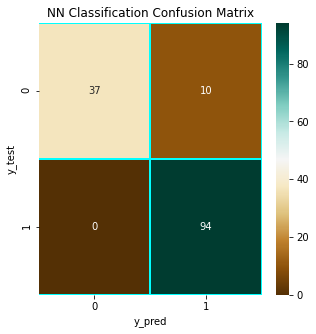

In [58]:
# Creating the confusion matrix:
cm = confusion_matrix(y_test, pred)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('NN Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [59]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        47
           1       0.90      1.00      0.95        94

    accuracy                           0.93       141
   macro avg       0.95      0.89      0.92       141
weighted avg       0.94      0.93      0.93       141

